# Lollipop 2

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.8

# bicycle frame
m = 15 # in kg
l = 1 # in m

# flywheel
m_flywheel = 0.5 # (mass of the flywheel)
r = 0.15 # radius of the flywheel (m)
I = (1/2) * m_flywheel*(r**2)

def phi_double_dot(theta, theta_dot, gamma=1, zeta=0.1):
    """Computes the phi double dot for a given gamma (proportionality constant) and zeta (damping coefficient), as well as a theta and theta dot value"""
    theta_double_dot = -(gamma)*theta - zeta*theta_dot
    
    # rearrange left hand side to yield phi double dot
    phi_double_dot = (-(m*l**2)/I)*(theta_double_dot - (g/l)*theta)
    
    return phi_double_dot

In [10]:
phi_double_dot(np.radians(5), 0)

2513.274122871835

Let's now iterate over a time series with believably increasing values for theta.

In [68]:
time = np.linspace(0, 5.0, num=100)

thetas = []
accelerations = []
velocities = []

previous_theta = 0

for t in time:
    theta = np.radians(t**3) # for now
    thetas.append(theta)
    
    theta_dot = (theta - previous_theta)/2 # for now
    velocities.append(theta_dot)
        
    acceleration = phi_double_dot(theta, theta_dot)
    accelerations.append(acceleration)
    
    previous_theta = theta

What does theta look when the bike is falling..? We are using a cubic function

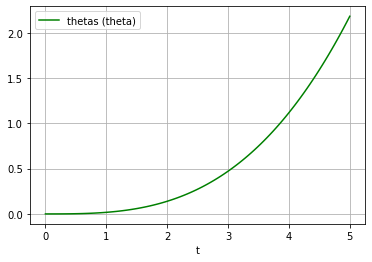

In [69]:
import matplotlib.pyplot as plt
# plt.plot(time, accelerations, 'b', label='accelerations (theta)')
plt.plot(time, thetas, 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

That looks reasonable...what about the velocity?

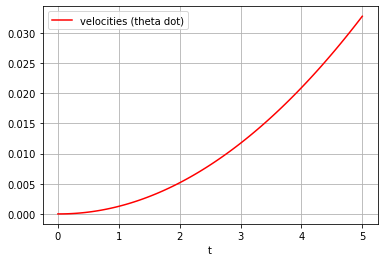

In [70]:
import matplotlib.pyplot as plt
# plt.plot(time, accelerations, 'b', label='accelerations (theta)')
# plt.plot(time, thetas, 'g', label='thetas (theta)')
plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Finally, what sort of tilt acceleration do we need to counteract the falling bicycle?

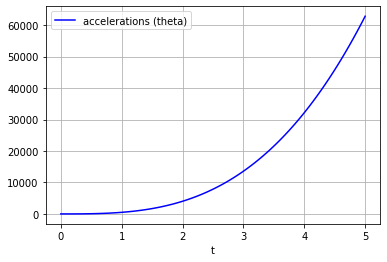

In [71]:
import matplotlib.pyplot as plt
plt.plot(time, accelerations, 'b', label='accelerations (theta)')
# plt.plot(time, thetas, 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

A remarkable acceleration (rad/s^2) is needed to steady the bicycle. At its peak, we see 60000 rad/s^2, which works out to 9500 rev/s^2! However, notice how small the acceleration is for small angles. Let's assume we can intervene at t = 1... then our acceleration is a paltry 500 rad/s^2, which seems quite manageable for a small stepper motor.